In [330]:
#Data Collection from ecommerce furniture dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [331]:
data = pd.read_csv("/content/ecommerce_furniture_dataset_2024.csv")
data.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [333]:
data.shape

(2000, 5)

In [334]:
data.index

RangeIndex(start=0, stop=2000, step=1)

In [335]:
data.columns

Index(['productTitle', 'originalPrice', 'price', 'sold', 'tagText'], dtype='object')

In [336]:
#Data Preprocessing
data.isnull().sum()

,0
productTitle,0
originalPrice,1513
price,0
sold,0
tagText,3


In [337]:
data.dropna(axis = 0,inplace=True)

In [338]:
data.shape

(487, 5)

In [339]:
data.head()

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",$123.4,53,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",$734.58,5,Free shipping
20,7-piece patio furniture set modular wicker out...,$671.47,$331.24,39,Free shipping


In [340]:
data['tagText'].nunique()


3

In [341]:
data['tagText'].value_counts()

,count
tagText,
Free shipping,485
+Shipping: $225.12,1
+Shipping: $2.91,1


In [342]:
data['tagText'] = data['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

In [343]:
print(data['tagText'].value_counts())

tagText
Free shipping    485
others             2
Name: count, dtype: int64


<Axes: xlabel='tagText', ylabel='count'>

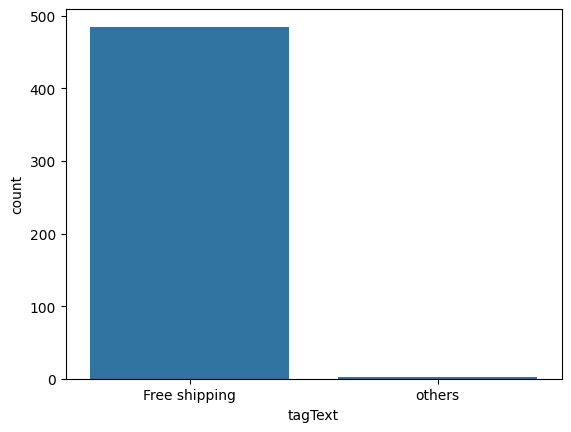

In [344]:
#Exploratory Data Analysis
sns.countplot(x='tagText',data=data)

In [345]:
data['price'] = data['price'].replace('[\$,]', '',
regex=True).astype(float)

In [346]:
data['price'].head()

,price
2,39.46
4,21.37
5,123.40
7,734.58
20,331.24


<Axes: xlabel='price', ylabel='Count'>

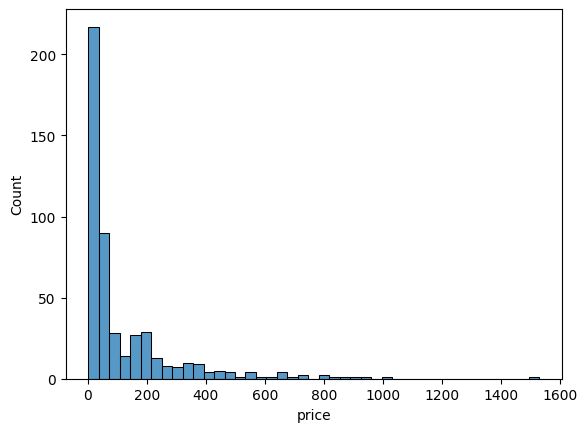

In [347]:
sns.histplot(data['price'])

<ipython-input-348-b5d1c80cd771>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sold'])


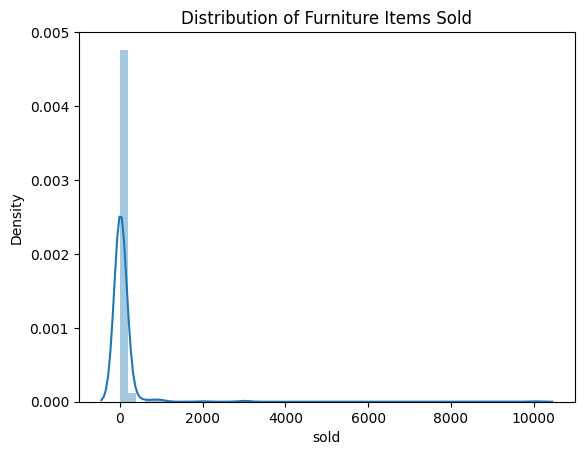

In [348]:
sns.distplot(data['sold'])
plt.title('Distribution of Furniture Items Sold')
plt.show()

<Axes: xlabel='price', ylabel='sold'>

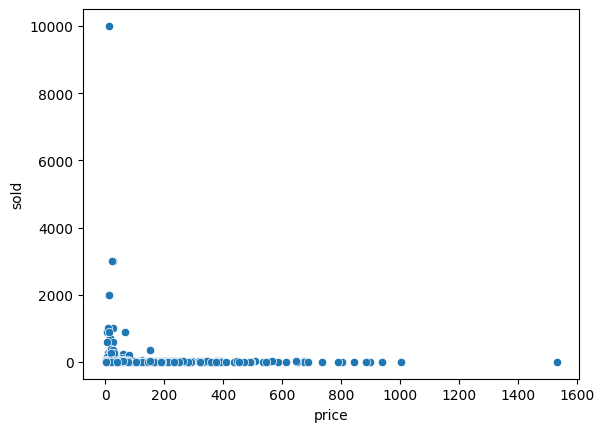

In [349]:
sns.scatterplot(x='price', y='sold', data=data)

In [350]:
filtered_data = data[data['tagText'] == 'Free shipping']

<Figure size 1100x600 with 0 Axes>

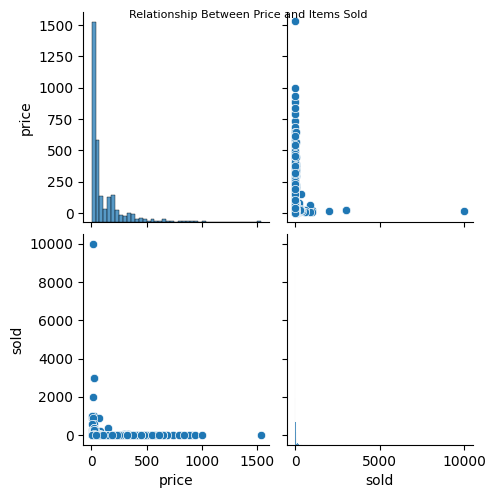

In [351]:
#Relationship Between Price and Items Sold
plt.figure(figsize = (11,6))
sns.pairplot(filtered_data[['price', 'sold']])
plt.suptitle('Relationship Between Price and Items Sold', fontsize=8)
plt.show()

In [352]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['tagText']=le.fit_transform(data['tagText'])

In [353]:
data.head()

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,39.46,7,0
4,Small Unit Simple Computer Desk Household Wood...,$48.82,21.37,1,0
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",123.40,53,0
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",734.58,5,0
20,7-piece patio furniture set modular wicker out...,$671.47,331.24,39,0


In [354]:
data['tagText'].value_counts()

,count
tagText,
0,485
1,2


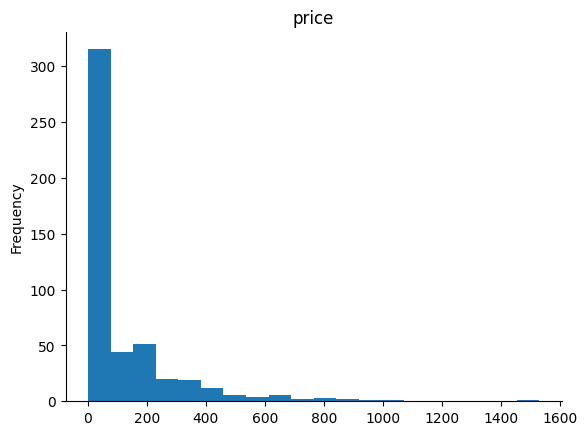

In [355]:
#Frequency of prices
data['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

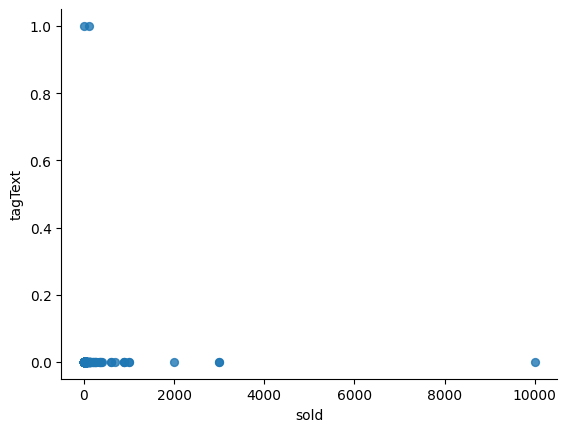

In [356]:

data.plot(kind='scatter', x='sold', y='tagText', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [357]:
data['originalPrice'] = data['originalPrice'].replace('[\$,]', '',regex=True).astype(float)

In [358]:
data

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,0
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,0
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,0
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,0
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,0
...,...,...,...,...,...
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",392.22,232.83,5,0
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,135.02,102.02,1,0
1955,"White Vanity Desk with Mirror, Lights and Char...",950.85,188.67,11,0
1964,PP Folding Stools Portable Lightweight Chairs ...,7.27,1.27,9,0


In [359]:
data['discount_percentage'] = ((data['originalPrice'] - data['price']) / data['originalPrice']) * 100

In [360]:
data.head()

,productTitle,originalPrice,price,sold,tagText,discount_percentage
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,0,49.668367
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,0,56.226956
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,0,90.463973
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,0,50.169926
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,0,50.669427


In [361]:
#Converting productTitle into a numeric feature using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=100)
productTitle_tfidf = tfidf.fit_transform(data['productTitle'])


In [362]:
data.head()

,productTitle,originalPrice,price,sold,tagText,discount_percentage
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,0,49.668367
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,0,56.226956
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,0,90.463973
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,0,50.169926
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,0,50.669427


In [363]:
# Converting to DataFrame and concatenate to original data
productTitle_tfidf_data = pd.DataFrame(productTitle_tfidf.toarray(), columns=tfidf.get_feature_names_out())
data = pd.concat([data, productTitle_tfidf_data], axis=1)


In [364]:
data.shape

(877, 106)

In [365]:
data = data.drop('productTitle', axis=1)

In [366]:
data

,originalPrice,price,sold,tagText,discount_percentage,adjustable,and,bed,bedroom,bedside,...,under,upholstered,vanity,velvet,wardrobe,white,wicker,with,wood,wooden
2,78.40,39.46,7.0,0.0,49.668367,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.312660,0.142439,0.0,0.0
4,48.82,21.37,1.0,0.0,56.226956,0.000000,0.191265,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.294782,0.134294,0.0,0.0
5,1294.04,123.40,53.0,0.0,90.463973,0.306330,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
7,1474.17,734.58,5.0,0.0,50.169926,0.306254,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
20,671.47,331.24,39.0,0.0,50.669427,0.000000,0.176284,0.000000,0.173699,0.0,...,0.0,0.000000,0.528684,0.0,0.0,0.524109,0.000000,0.123775,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,NaN,NaN,NaN,NaN,NaN,0.000000,0.310758,0.000000,0.000000,0.0,...,0.0,0.461957,0.000000,0.0,0.0,0.000000,0.000000,0.218195,0.0,0.0
481,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.233799,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.117618,0.0,0.0
482,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.278405,0.126833,0.0,0.0
485,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [367]:
data.dropna(inplace = True)

In [368]:
#Model selection and training process
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [369]:
# Split the dataset into features (X) and target (y)
X = data.drop('sold', axis=1)
y = data['sold']


In [370]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


In [371]:
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)


In [372]:
# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [373]:
#Prediction with linear regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


In [374]:
# Prediction with Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [375]:
# Model evaluation results
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')
print(f'Random Forest MSE: {mse_rf}, R2: {r2_rf}')


Linear Regression MSE: 385345.9606710381, R2: -1422.5823991541467
Random Forest MSE: 6287.693744999999, R2: -22.228607693373352


# Conclusion
From the overall process we can conclude that although the random forest model still requires work (since R2 is negative), it is the superior model in this case in comparison with the Linear Regression area.  However, in terms of error and explanatory power, it is orders of magnitude superior to linear regression. There are several reasons which can be considered for the underperformance of the linear regression model. These reaons can most likely be:

1. Features that are noisy or irrelevant: The presence of noise or unwanted data in the dataset can be considered an area of concern

2. Presence of Outliers: Linear regression can be significantly prone to lower performance because of such outliers.

3. Requirement of data scaling

# Further Insights

From the overall analysis of the dataset we have been able to understand that:

1. The amount of free shipping available for different products presented to customers as part of the service is significantly high in comparison to other perimeters such as shipping which charges included

2. In A positively skewed graph of prices for the products we can observe maximum frequency within the range of 0 to 200 rupees.

3. We have found that maximum density lies in the 0 to 200 range considering price in the x-axis and 0 to 2000 range in the y-axis representing items sold. This result was created after making a scatter plot of both these items.